In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st

In [2]:
### задаем параметры нормального распредеелния
n=19
a=2
Sigma=3
#########################################
gamma=0.90 ### доверительная вероятность

In [3]:
#### генерируем выборку из нормально распределенной СВ X
X= np.random.normal(a,Sigma,size = n)

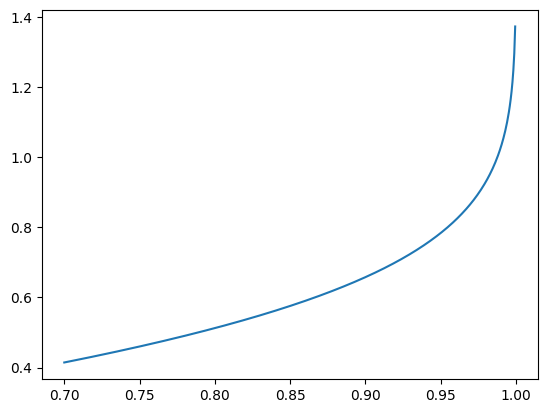

In [5]:
##### Изучаем зависимость точности интервальной оценки для MX при известной дисперсии от надежности 
#### при неизменном объему выборки
#################################
sample = np.random.normal(a, Sigma, n)
a_estimate=np.mean(sample)
##################################
V=500
### массив gamma_ будет содержать V значений надежности
gamma_=[0.0]*V
### массив delta_ будет содержать V значений длин доверительных интервалов, отвечающих соответствующим надежностям
delta_=[0.0]*V
gamma__0=0.7
gamma__1=0.9999999999
h=(gamma__1-gamma__0)/V
for i in range(V):
    gamma_[i]=gamma__0+i*h
    interval_estimate_MX=st.norm.interval(confidence=gamma_[i], 
              loc=a_estimate, 
              scale=Sigma/np.sqrt(n)) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
###print(delta_)
plt.plot(gamma_,delta_)

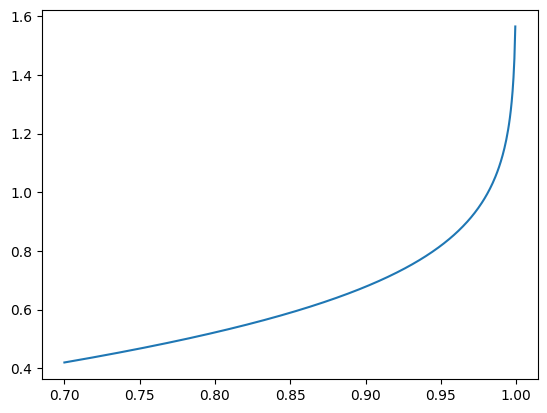

In [6]:
##### Изучаем зависимость точности интервальной оценки для MX при неизвестной дисперсии от надежности 
#### при неизменном объему выборки
#################################
sample = np.random.normal(a, Sigma, n)
a_estimate=np.mean(sample)
##################################
V=500
### массив gamma_ будет содержать V значений надежности
gamma_=[0.0]*V
### массив delta_ будет содержать V значений длин доверительных интервалов, отвечающих соответствующим надежностям
delta_=[0.0]*V
gamma__0=0.7
gamma__1=0.9999999999
h=(gamma__1-gamma__0)/V
for i in range(V):
    gamma_[i]=gamma__0+i*h
    interval_estimate_MX=st.t.interval(confidence=gamma_[i],
              df=n-1,
              loc=a_estimate, 
              scale=st.sem(X,ddof=1)) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
###print(delta_)
plt.plot(gamma_,delta_)